# Import Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Data Loading

In [30]:
import os
import cv2
import numpy as np

class_labels = {'Healthy': 0, 'Late_blight': 1, 'Early_blight': 2}

def load_images_from_folder(folder_path):
    images = []
    labels = []
    class_names = os.listdir(folder_path)
    #class_mapping = {class_name: index for index, class_name in enumerate(class_names)}

    for class_name in class_names:
        y = class_labels[class_name]
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                if os.path.isfile(img_path):
                    image = cv2.imread(img_path)
                    if image is not None:
                        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format if needed
                        image = cv2.resize(image,(224,224))
                        images.append(image)
                        labels.append(y)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Example usage:
train_folder = '/content/drive/MyDrive/CIT-Projects/Potato Disease Classification/Dataset/Train'
test_folder = '/content/drive/MyDrive/CIT-Projects/Potato Disease Classification/Dataset/Test'
valid_folder = '/content/drive/MyDrive/CIT-Projects/Potato Disease Classification/Dataset/Valid'

X_train, y_train = load_images_from_folder(train_folder)
X_test, y_test = load_images_from_folder(test_folder)  # Don't need class_mapping for test set
X_valid, y_valid = load_images_from_folder(valid_folder)  # Don't need class_mapping for validation set


In [36]:
class_labels = {'Healthy': 0, 'Late_blight': 1, 'Early_blight': 2}
classes = ["Healthy","Late_blight","Early_Blight" ]

In [31]:
X_train.shape , y_train.shape

((900, 224, 224, 3), (900,))

In [32]:
X_valid.shape , y_valid.shape

((300, 224, 224, 3), (300,))

In [33]:
X_test.shape , y_test.shape

((300, 224, 224, 3), (300,))

In [34]:
np.unique(y_valid)

array([0, 1, 2])

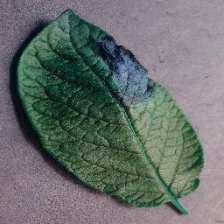

Late_blight


In [37]:
from google.colab.patches import cv2_imshow

cv2_imshow(X_train[140])
print(classes[y_train[140]])

# Model Building

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

model = Sequential(
    [
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=[224,224,3]), #filters=16,kernel_size=3
  layers.MaxPooling2D(), #default pool_size=(2,2)
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),


  layers.Flatten(),

  layers.Dense(units=20, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(units=10,activation='relu'),
  layers.Dense(units=3, activation='softmax')
]
)

# opt = Adam(learning_rate = 0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Batc  (None, 56, 56, 32)       128       
 hNormalization)                                                 
                                                      

# Fitting the Model with Training and Validation Data

In [39]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint
file_path = '/content/drive/MyDrive/CIT-Projects/Potato Disease Classification/Model/model.h5'
checkpoint = ModelCheckpoint(file_path, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode ='max')

callbacks_List = [checkpoint]

history = model.fit(X_train,y_train,
                    epochs=50,
                    validation_data = (X_valid,y_valid),
                    callbacks = callbacks_List
                    )

Epoch 1/50
29/29 [==============================] - ETA: 0s - loss: 1.2124 - accuracy: 0.4311
Epoch 1: accuracy improved from -inf to 0.43111, saving model to /content/drive/MyDrive/CIT-Projects/Potato Disease Classification/Model/model.h5
29/29 [==============================] - 5s 80ms/step - loss: 1.2124 - accuracy: 0.4311 - val_loss: 6.4211 - val_accuracy: 0.3333
Epoch 2/50
28/29 [===========================>..] - ETA: 0s - loss: 0.6397 - accuracy: 0.7121
Epoch 2: accuracy improved from 0.43111 to 0.71222, saving model to /content/drive/MyDrive/CIT-Projects/Potato Disease Classification/Model/model.h5
29/29 [==============================] - 1s 35ms/step - loss: 0.6396 - accuracy: 0.7122 - val_loss: 7.4876 - val_accuracy: 0.3333
Epoch 3/50
27/29 [==========================>...] - ETA: 0s - loss: 0.5246 - accuracy: 0.7465
Epoch 3: accuracy improved from 0.71222 to 0.74444, saving model to /content/drive/MyDrive/CIT-Projects/Potato Disease Classification/Model/model.h5
29/29 [=======

In [40]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 12ms/step - loss: 0.2344 - accuracy: 0.9367


[0.23444075882434845, 0.9366666674613953]

In [41]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion matrix')
print(confusion_matrix(y_pred, y_test))

# print('\nclassification report')
# print(validation_generator.classes)

10/10 [==============================] - 0s 10ms/step
Confusion matrix
[[88  2  0]
 [ 9 94  1]
 [ 3  4 99]]


<Axes: >

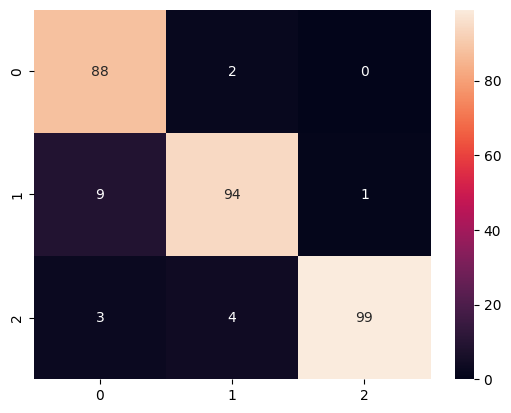

In [43]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt="g")

10/10 [==============================] - 0s 14ms/step
Confusion matrix


<Axes: >

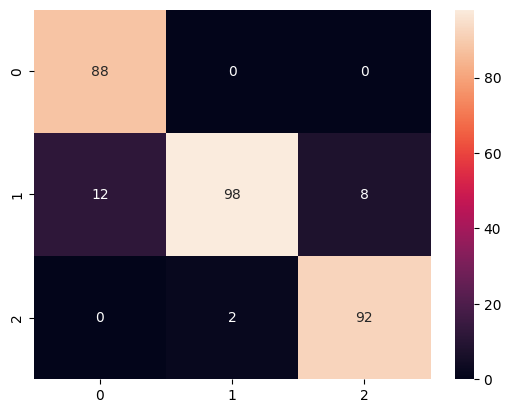

In [45]:
Y_pred = model.predict(X_valid)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion matrix')
sns.heatmap(confusion_matrix(y_pred, y_valid), annot = True, fmt="g")

29/29 [==============================] - 1s 17ms/step
Confusion matrix


<Axes: >

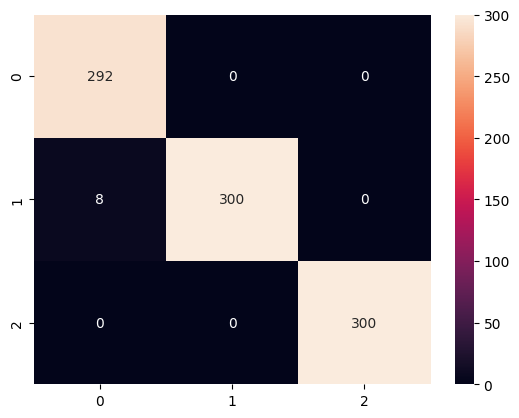

In [46]:
Y_pred = model.predict(X_train)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion matrix')
sns.heatmap(confusion_matrix(y_pred, y_train), annot = True, fmt="g")

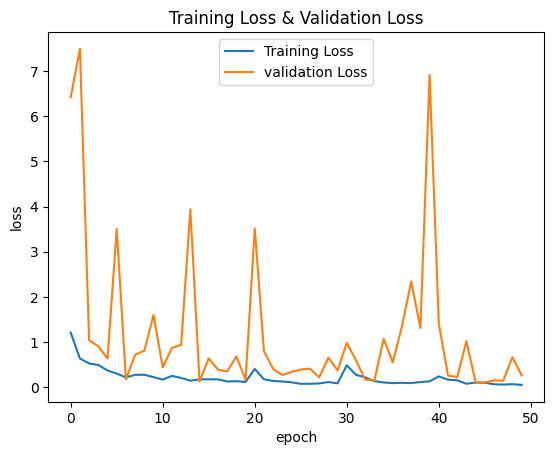

In [48]:
import matplotlib.pyplot as plt

plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'validation Loss')
plt.title('Training Loss & Validation Loss')
plt.legend()
plt.show()

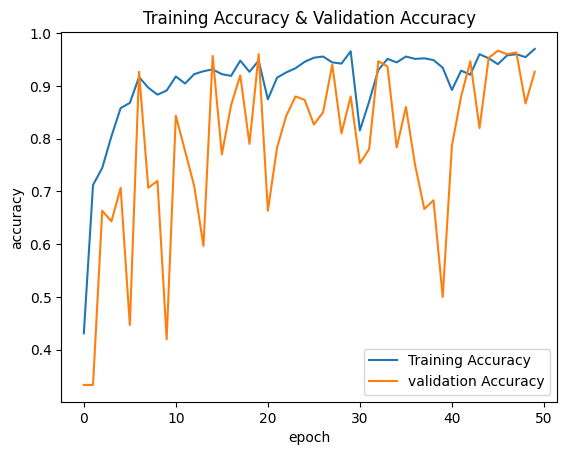

In [49]:
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation Accuracy')
plt.title('Training Accuracy & Validation Accuracy')
plt.legend()
plt.show()

Saving 8435fd63-0136-44f9-8dd4-6ca27bcddd97___RS_Early.B 7017.JPG to 8435fd63-0136-44f9-8dd4-6ca27bcddd97___RS_Early.B 7017.JPG
1/1 [==============================] - 0s 106ms/step


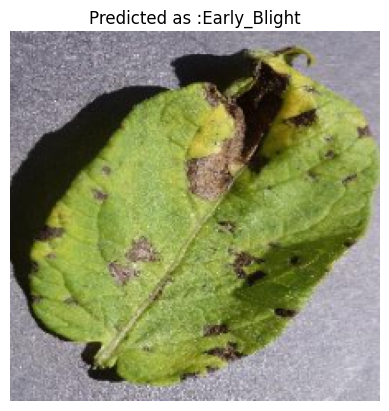

In [54]:
from tensorflow.keras.models import load_model
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

loaded_model = load_model("/content/drive/MyDrive/CIT-Projects/Potato Disease Classification/Model/model.h5")

def load_image(filename):
    image = cv2.imread(filename)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format if needed
        image = cv2.resize(image, (224, 224))
        return image
    else:
        raise ValueError("Failed to load image!")

# Upload the image file in Colab
uploaded = files.upload()

# Get the uploaded file name
uploaded_filename = next(iter(uploaded))

# Load the uploaded image
img = load_image(uploaded_filename)

image = np.expand_dims(img, axis = 0)

pred = loaded_model.predict(image)
pred = np.argmax(pred)
predicted_class = classes[pred]

plt.imshow(img)
plt.title(f"Predicted as :{predicted_class}")
plt.axis('off')
plt.show()
